#Q2

In [1]:
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

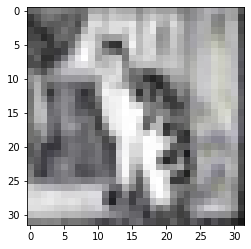

In [4]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [26]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
fc_model.add(keras.layers.Flatten())
fc_model.add(keras.layers.Dense(32, activation='relu'))
fc_model.add(keras.layers.Dense(10, activation='relu'))
# Add Flatten layer and few Dense layers
fc_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 3072)              0         
                                                                 
 dense_35 (Dense)            (None, 32)                98336     
                                                                 
 dense_36 (Dense)            (None, 10)                330       
                                                                 
Total params: 98,666
Trainable params: 98,666
Non-trainable params: 0
_________________________________________________________________


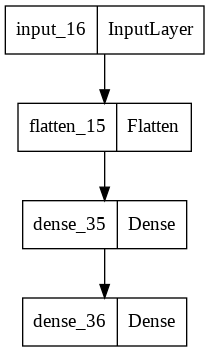

In [27]:
plot_model(fc_model)

In [24]:
Conv_model = keras.Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
Conv_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
Conv_model.add(keras.layers.MaxPooling2D((2, 2)))
Conv_model.add(keras.layers.Conv2D(16, (3, 3), activation='relu'))
Conv_model.add(keras.layers.Flatten())
Conv_model.add(keras.layers.Dense(16, activation='relu'))
Conv_model.add(keras.layers.Dense(10, activation='relu'))
# add few Conv layers and Flatten layer
# you can use pool layers after Conv layers
Conv_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 16)        4624      
                                                                 
 flatten_13 (Flatten)        (None, 2704)              0         
                                                                 
 dense_30 (Dense)            (None, 16)                43280     
                                                                 
 dense_31 (Dense)            (None, 10)                170       
                                                     

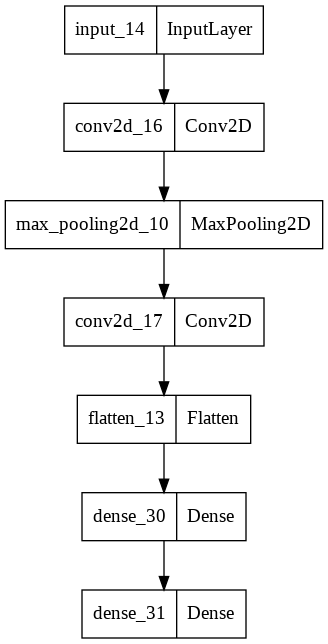

In [28]:
plot_model(Conv_model)

In [29]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 8.3676 - accuracy: 0.1730
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 6.4393 - accuracy: 0.1849
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 6.0611 - accuracy: 0.2081
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 6.1278 - accuracy: 0.1373
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 6.0800 - accuracy: 0.1732


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 2ms/step - loss: 6.0628 - accuracy: 0.1910


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 12s 4ms/step - loss: 3.8055 - accuracy: 0.1503
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 3.5308 - accuracy: 0.1489
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 3.4156 - accuracy: 0.1722
Epoch 4/5
1563/1563 [==

Fully Connected Mode:

    Loss => 6.06 

    Accuracy => 19%

Convolutional Model:

    Loss => 3.39

    Accuracy => 17%
  
Reducing LOSS does not always increase ACCURACY.

Epoch Times are almost same.

#Q3

In [30]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt

In [31]:
!rm -r sample_data

In [32]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:12<00:00, 45.7MB/s]


In [ ]:
!unzip fruits-360-original-size.zip

## A : complete resize image

In [34]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [39]:
def resize_img(img, desired_size = 224):
    # write your code here
    old_size = img.shape[:2] 

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_img = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,value=color)
    return new_img

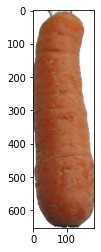

In [37]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

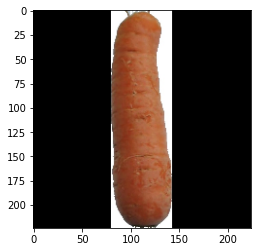

In [40]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [41]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [42]:
# YOU CAN CHANGE IT
EPOCHS = 30

In [44]:
resnet = tf.keras.models.Sequential()
# Write your code here
resnet.add(tf.keras.applications.ResNet50(weights=None,classes = 24))
resnet.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 24)                23636888  
                                                                 
Total params: 23,636,888
Trainable params: 23,583,768
Non-trainable params: 53,120
_________________________________________________________________


In [45]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [46]:
resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 73s 979ms/step - loss: 0.8179 - acc: 0.7727


## C : Fine-tune Resnet50 on fruits dataset.

In [52]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
fine_tune_resnet.add(tf.keras.applications.ResNet50(
    include_top=True,
    weights="imagenet",
    classes=1000))
fine_tune_resnet.add(tf.keras.layers.Dense(64,activation='relu'))
fine_tune_resnet.add(tf.keras.layers.Dense(24,activation='relu'))

fine_tune_resnet.summary()


102967424/102967424 [==============================] - 6s 0us/step
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense_37 (Dense)            (None, 64)                64064     
                                                                 
 dense_38 (Dense)            (None, 24)                1560      
                                                                 
Total params: 25,702,336
Trainable params: 25,649,216
Non-trainable params: 53,120
_________________________________________________________________


In [53]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [54]:
fine_tune_resnet.fit(train_generator, epochs=1)

65/65 [==============================] - 66s 930ms/step - loss: 3.7456 - acc: 0.3589


## Test models

In [55]:
resnet.evaluate(test_generator)

33/33 [==============================] - 19s 549ms/step - loss: 7.3053 - acc: 0.0752


[7.305299758911133, 0.07524115592241287]

In [56]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 18s 516ms/step - loss: 13.8412 - acc: 0.0482


[13.84122371673584, 0.04823151230812073]

Accuracy Not Freezed Waights > Freezed Waights